# 项目：分析鸢尾花种类数据

## 分析目标

此数据分析报告的目的是基于鸢尾花的属性数据，分析两种鸢尾花萼片、花瓣的长度和宽度平均值，是否存在显著性差异，让我们可以对不同种类鸢尾花的属性特征进行推断。

## 简介

原始数据`Iris.csv`包括两种鸢尾花，每种有 50 个样本，以及每个样本的一些属性，包括萼片的长度和宽度、花瓣的长度和宽度。

`Iris.csv`每列的含义如下：
- Id：样本的ID。
- SepalLengthCm：萼片的长度（单位为厘米）。
- SepalWidthCm：萼片的宽度（单位为厘米）。
- PetalLengthCm：花瓣的长度（单位为厘米）。
- PetalWidthCm：花瓣的宽度（单位为厘米）。
- Species：鸢尾花种类。

# 读取数据

In [3]:
import numpy as np
import pandas as pd

# 引入t检验相关函数
from scipy.stats import ttest_ind

# 引入Z检验相关函数
from statsmodels.stats.weightstats import ztest

# 引入绘图相关库
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib

In [4]:
original_data=pd.read_csv(r"C:\Users\YU\Downloads\Iris.csv")

In [5]:
original_data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


# 评估和清理数据

In [6]:
cleaned_data=original_data.copy()

## 数据整齐度

In [7]:
cleaned_data.head(10)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
5,6,5.4,3.9,1.7,0.4,Iris-setosa
6,7,4.6,3.4,1.4,0.3,Iris-setosa
7,8,5.0,3.4,1.5,0.2,Iris-setosa
8,9,4.4,2.9,1.4,0.2,Iris-setosa
9,10,4.9,3.1,1.5,0.1,Iris-setosa


## 数据干净度

In [8]:
cleaned_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             100 non-null    int64  
 1   SepalLengthCm  100 non-null    float64
 2   SepalWidthCm   100 non-null    float64
 3   PetalLengthCm  100 non-null    float64
 4   PetalWidthCm   100 non-null    float64
 5   Species        100 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 4.8+ KB


In [9]:
cleaned_data['Id']=cleaned_data['Id'].astype('str')
cleaned_data['Id']

0       1
1       2
2       3
3       4
4       5
     ... 
95     96
96     97
97     98
98     99
99    100
Name: Id, Length: 100, dtype: object

In [10]:
cleaned_data['Species']=cleaned_data['Species'].astype('category')
cleaned_data['Species']

0         Iris-setosa
1         Iris-setosa
2         Iris-setosa
3         Iris-setosa
4         Iris-setosa
           ...       
95    Iris-versicolor
96    Iris-versicolor
97    Iris-versicolor
98    Iris-versicolor
99    Iris-versicolor
Name: Species, Length: 100, dtype: category
Categories (2, object): ['Iris-setosa', 'Iris-versicolor']

### 处理缺失数据

从info方法的输出结果来看，cleaned_data不存在缺失值，因此不需要对缺失数据进行处理。

### 处理重复数据

In [12]:
cleaned_data['Id'].duplicated().sum()

np.int64(0)

### 处理不一致数据

In [13]:
cleaned_data['Species'].value_counts()

Species
Iris-setosa        50
Iris-versicolor    50
Name: count, dtype: int64

### 处理无效或错误数据

In [15]:
cleaned_data.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,100.000000,100.000000,100.000000,100.000000
mean,5.471000,3.094000,2.862000,0.785000
std,0.641698,0.476057,1.448565,0.566288
min,4.300000,2.000000,1.000000,0.100000
25%,5.000000,2.800000,1.500000,0.200000
50%,5.400000,3.050000,2.450000,0.800000
75%,5.900000,3.400000,4.325000,1.300000
max,7.000000,4.400000,5.100000,1.800000


# 整理数据

对数据的整理，与分析方向紧密相关。此次数据分析目标是，基于鸢尾花的属性数据，分析两种鸢尾花萼片、花瓣的长度和宽度平均值，是否存在显著性差异。

那么我们可以对数据基于Species列，先把各个鸢尾花种类样本数据筛选出来。

In [18]:
iris_setosa = cleaned_data.query('Species=="Iris-setosa"')
iris_setosa.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [19]:
len(iris_setosa)

50

In [21]:
iris_versicolor=cleaned_data.query('Species=="Iris-versicolor"')
iris_versicolor.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
50,51,7.0,3.2,4.7,1.4,Iris-versicolor
51,52,6.4,3.2,4.5,1.5,Iris-versicolor
52,53,6.9,3.1,4.9,1.5,Iris-versicolor
53,54,5.5,2.3,4.0,1.3,Iris-versicolor
54,55,6.5,2.8,4.6,1.5,Iris-versicolor


In [24]:
len(iris_versicolor)

50

# 探索数据

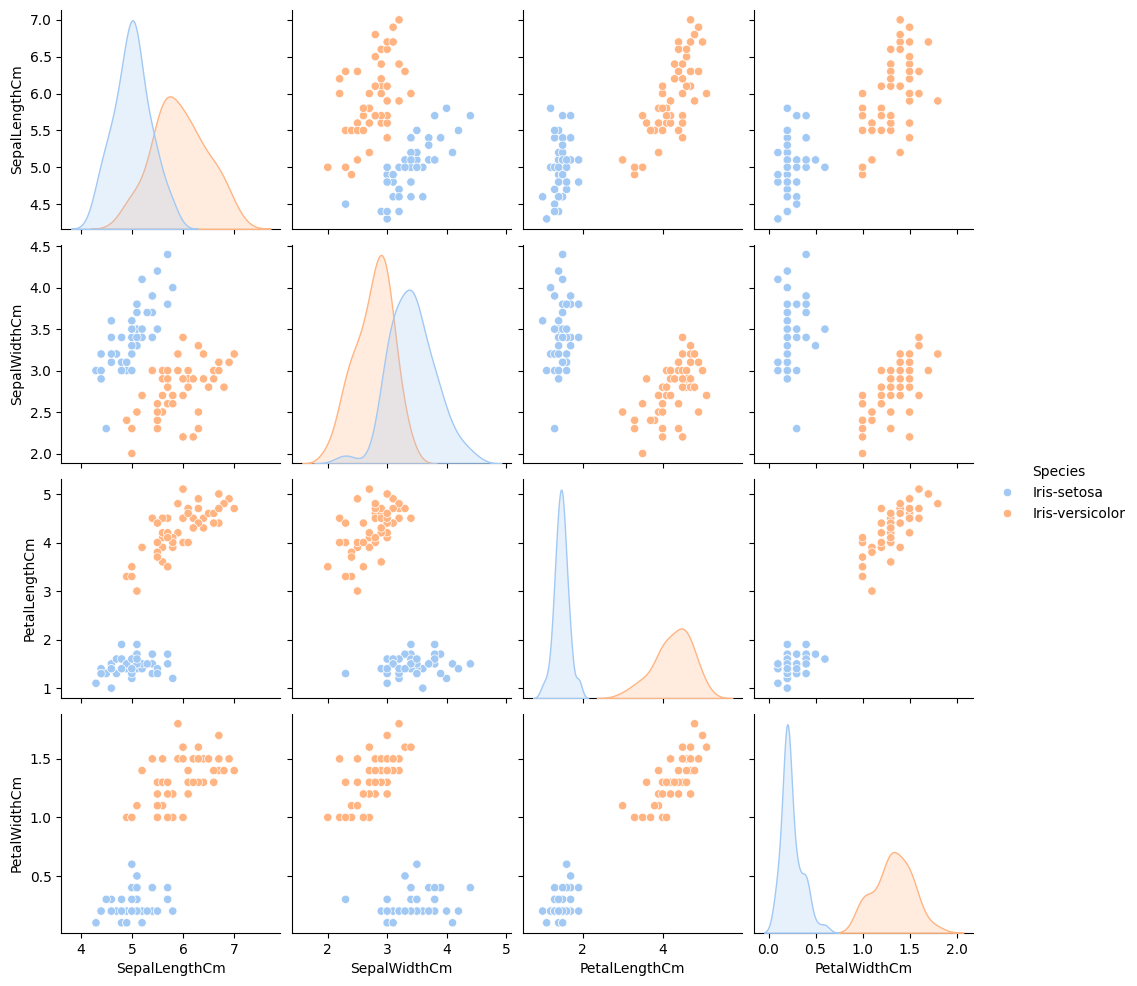

In [23]:
sns.set_palette('pastel')
sns.pairplot(cleaned_data,hue='Species')
plt.show()

从以上可以看出，Setosa和Versicolor样本的花瓣长度以及花瓣宽度的分布存在明显数值上的不同，已经可以猜测假设检验的结果是，两种鸢尾花的花瓣长度与宽度有统计显著性差异。

萼片的长度和宽度在分布上存在重叠，暂时无法仅通过图表下结论，需要进行假设检验，来推断总体的萼片长度和宽度之间是否有差异。

# 分析数据

### 分析萼片长度

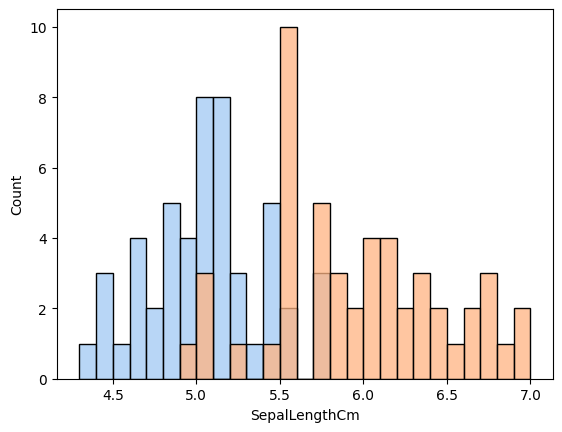

In [38]:
sns.histplot(iris_setosa['SepalLengthCm'], binwidth=0.1)
sns.histplot(iris_versicolor['SepalLengthCm'], binwidth=0.1)
plt.show()

#### 建立假设

$H_0$：Setosa鸢尾花和Versicolor鸢尾花萼片长度的平均值不存在显著区别。

$H_1$: Setosa鸢尾花和Versicolor鸢尾花萼片长度的平均值存在显著区别。

由于我们只检验平均值是否存在差异，不在乎哪个品种的萼片更长，所以选择双尾检验。

我们将选择0.05作为显著水平。

In [30]:
t_stat,p_value=ttest_ind(iris_setosa['SepalLengthCm'],iris_versicolor['SepalLengthCm'])
print('t值=',t_stat)
print('p值=',p_value)

t值= -10.52098626754911
p值= 8.985235037487079e-18


#### 结论

由于p值小于显著水平0.05，我们因此拒绝原假设，说明Setosa鸢尾花和Versicolor鸢尾花萼片长度的平均值存在显著区别。

### 分析萼片宽度

#### 建立假设
$H_0$：Setosa鸢尾花和Versicolor鸢尾花萼片宽度的平均值不存在显著区别。

$H_1$：Setosa鸢尾花和Versicolor鸢尾花萼片宽度的平均值存在显著区别。

由于我们只检验平均值是否存在差异，不在乎哪个品种的萼片更宽，所以选择双尾检验。

我们将选择0.05作为显著水平。

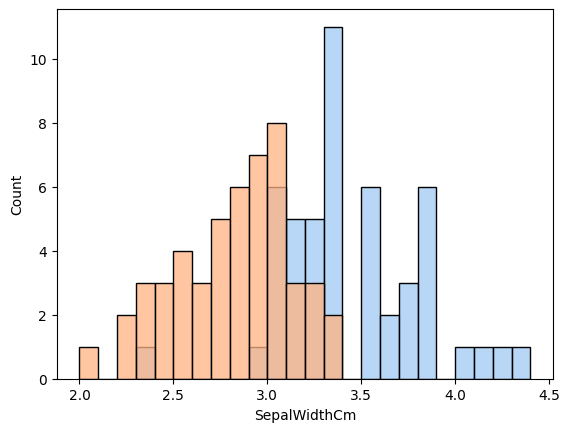

In [31]:
sns.histplot(iris_setosa['SepalWidthCm'], binwidth=0.1)
sns.histplot(iris_versicolor['SepalWidthCm'], binwidth=0.1)
plt.show()

In [33]:
t_stat,p_value=ttest_ind(iris_setosa['SepalWidthCm'],iris_versicolor['SepalWidthCm'])
print('t值=',t_stat)
print('p值=',p_value)

t值= 9.282772555558111
p值= 4.362239016010214e-15


#### 结论

由于p值小于显著水平0.05，我们因此拒绝原假设，说明Setosa鸢尾花和Versicolor鸢尾花萼片宽度的平均值存在显著区别。

### 分析花瓣长度

#### 建立假设
$H_0$：Setosa鸢尾花和Versicolor鸢尾花花瓣长度的平均值不存在显著区别。

$H_1$：Setosa鸢尾花和Versicolor鸢尾花花瓣长度的平均值存在显著区别。

由于我们只检验平均值是否存在差异，不在乎哪个品种的花瓣更长，所以选择双尾检验。

我们将选择0.05作为显著水平。

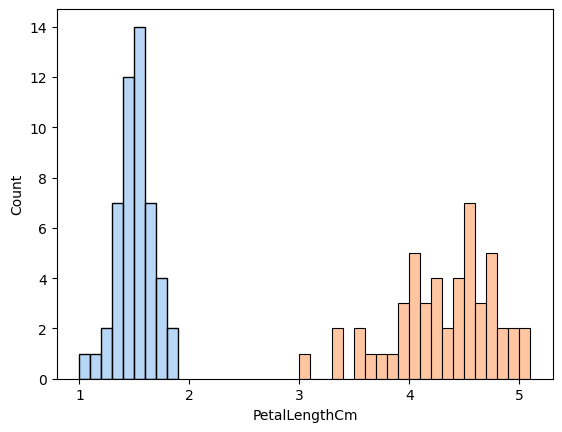

In [35]:
sns.histplot(iris_setosa['PetalLengthCm'], binwidth=0.1)
sns.histplot(iris_versicolor['PetalLengthCm'], binwidth=0.1)
plt.show()

In [36]:
t_stat,p_value=ttest_ind(iris_setosa['PetalLengthCm'],iris_versicolor['PetalLengthCm'])
print('t值=',t_stat)
print('p值=',p_value)

t值= -39.46866259397272
p值= 5.717463758170621e-62


#### 结论

由于p值小于显著水平0.05，我们因此拒绝原假设，说明Setosa鸢尾花和Versicolor鸢尾花花瓣长度的平均值存在显著区别。

### 分析花瓣宽度

#### 建立假设
$H_0$：Setosa鸢尾花和Versicolor鸢尾花花瓣长度的平均值不存在显著区别。

$H_1$：Setosa鸢尾花和Versicolor鸢尾花花瓣长度的平均值存在显著区别。

由于我们只检验平均值是否存在差异，不在乎哪个品种的花瓣更长，所以选择双尾检验。

我们将选择0.05作为显著水平。

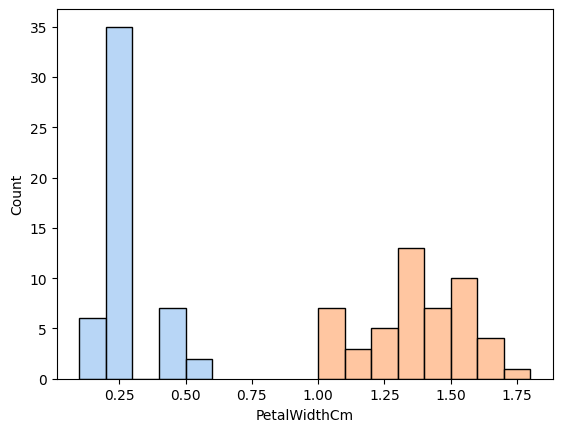

In [39]:
sns.histplot(iris_setosa['PetalWidthCm'], binwidth=0.1)
sns.histplot(iris_versicolor['PetalWidthCm'], binwidth=0.1)
plt.show()

In [40]:
t_stat,p_value=ttest_ind(iris_setosa['PetalWidthCm'],iris_versicolor['PetalWidthCm'])
print('t值=',t_stat)
print('p值=',p_value)

t值= -34.01237858829048
p值= 4.589080615710866e-56


#### 结论

由于p值小于显著水平0.05，我们因此拒绝原假设，说明Setosa鸢尾花和Versicolor鸢尾花花瓣宽度的平均值存在显著区别。

## 结论

通过推论统计学的计算过程，我们发现，Setosa鸢尾花和Versicolor鸢尾花萼片、花瓣的长度和宽度平均值，均存在具有统计显著性的差异。